# Project: Investigate a Dataset - [TMDb-Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this project, we'll be exploring the IMDb Movie Dataset. This data set contains information on over 10 thousand
movies, including user rating, revenue, budget and many more.

There are several columns that we'll be going over on this data set, brief description: 

**1.id** : Unique id
**2.imdb_id** : IMDb special id
**3.popularity** : Popularity Score
**4.budget** : Movie Budget
**5.revenue** : Movie Revenue
**6.original_title** : Movie Title
**7.cast** : Movie Actors
**8.homepage** : Movie Website
**9.director** : Director of the movie
**10.tagline** : Movie Tag
**11.keywords** :Movie keywords
**12.overview** : Movie Overview
**13.runtime** : Movie Duration
**14.genres** : Movie Genre
**15.production_companies** : Companies responsible for producing movie
**16.release_date** : Movie release date
**17.vote_count** : N. of votes by viewers
**18.vote_average**: Avg. of votes by viewers
**19.release_year** : Movie release year
**20.budget_adj** : Movie Budget
**21.revenue_adj** : Movie Revenue

### Question(s) for Analysis

These are example of some questions we could interpert from the upcoming analysis:

**1.** What genres are most popular?
**2.** Were there recurrent actors in more than one movie and who?
**3.** Is there any relationship between profit, revenue and profit, budget?
**4.** Which year made the highest and lowest profit?

In [2]:
# Here we will be importing the packages/libraries we need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [29]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.2MB/s eta 0:00:01   21% |██████▉                         | 2.2MB 18.9MB/s eta 0:00:01    31% |██████████▏                     | 3.3MB 17.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.7MB/s eta 0:00:01  2% |█                               | 389kB 23.4MB/s eta 0:00:01    22% |███████▏                        | 3.0MB 27.4MB/s eta 0:00:01    40% |█████████████                   | 5.5MB 26.6MB/s eta 0:00:01    49% |███████████████▉                | 6.6MB 22.4MB/s eta 0:00:01    65% |████████████████████▉           | 8.7MB 21.2MB/s eta 0:00:01    81% |██████████████████████████      | 10.9MB 19.9MB/s eta 0:00:01    88% |████████████████████████████▏   | 11.8MB 18.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: p

<a id='wrangling'></a>
## Data Wrangling

In this coming section, we'll load the data, take a look at a portion of the data, check if there are errors of any kind, if it needs cleaning.


### General Properties
Let's take a look at a sample of our data.

### First step is load the file and take a look at what we're dealing with

In [3]:
# We'll load the file and check the first 5 rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## The following steps are necessary to check the dimensions (number of columns and rows), and missing values if there's any

### Getting to know the # of columns and # of rows

In [32]:
# From this we can see that our data has 10866 rows and 21 columns
df.shape

(10866, 21)

### Since we'll soon start the cleaning process, we need to take a look at any null values, incorrect data type or anything that requires cleaning or dropping

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Simple way to get count of null values

In [34]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Last but not least, we get to see the # of duplicated values

In [35]:
df.duplicated().sum()

1


### Data Cleaning
For this part, we'll be removing columns that are not useful or needed, the null values, the duplicates, to ensure that we have a clean quality data. 

In [36]:
# First is to remove unnecessary columns
df.drop(['id','imdb_id','homepage','budget_adj','revenue_adj','keywords','overview','vote_count','vote_average'],axis=1,inplace=True)

In [37]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
release_year            10866 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 1018.8+ KB


(10866, 12)

### Now we clean the null values

In [38]:
# We've already brought up the null values before so no need to do it again and we can just remove them
df.dropna(inplace=True)

In [39]:
# To confirm no more null
df.isnull().sum().any()

False

### Next, we clean the duplicate value

In [40]:
# To remove duplicates
df.drop_duplicates(inplace=True)

### Then we correct datatypes

In [33]:
# Change release date from int to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
# Lastly we create this column for 3rd question later on
df.insert(2,'profit_earned',df['revenue']-df['budget'])

<a id='eda'></a>
## Exploratory Data Analysis

Now is the time to take a look at the data and gather insight from it, answering questions that we have by computing statistics and creating visualizations.


### Research Question 1 (What genres are most popular?)

In [42]:
### Let's first take a general look at the numbers
df.describe()

,popularity,budget,revenue,runtime,release_year
count,7635.000000,7.635000e+03,7.635000e+03,7635.000000,7635.000000
mean,0.792953,1.963939e+07,5.528189e+07,104.299018,1999.962672
std,1.142895,3.508058e+07,1.358346e+08,25.104827,13.357248
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.267342,0.000000e+00,0.000000e+00,91.500000,1992.000000
50%,0.479771,3.500000e+06,2.260622e+06,100.000000,2004.000000
75%,0.912221,2.500000e+07,4.802269e+07,113.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,2015.000000


### Lets look at our first histogram and see if it tells us anything

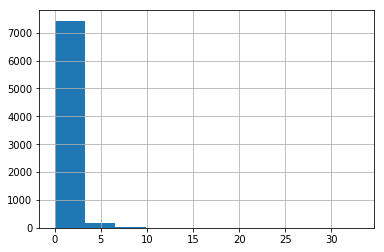

In [43]:
# As we can see, it doesn't really provide much, so we have to dig deeper
df.popularity.hist();

#### Let's create a function that would we can use anytime for our first questions

In [16]:
#function takes in any column then keeps track of it since we've got multiple genres
def divide(col_name):
    #this take a column, and separates with '|'
    divide = df[col_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    divide = pd.Series(divide.split('|'))
    
    #The result will be in descending order so that the first element is the most frequently-occurring element.
    frequency = divide.value_counts(ascending = False)
    
    return frequency

In [17]:
#calls the divide function to seperate and store genres in a variable then prints them
genres = divide('genres')
genres

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

#### Now we can create our first visualization

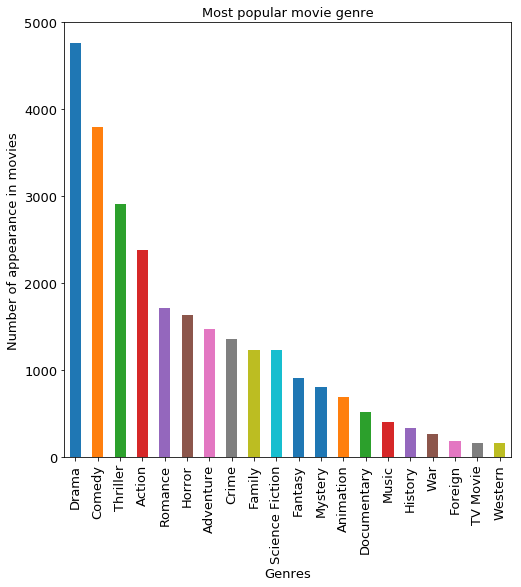

In [30]:
g_bar = genres.plot.bar(fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(8, 8);

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '13')
plt.xlabel('Genres', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

#### Looks like our most popular genre is Drama

### Research Question 2  (Were there recurrent actors in more than one movie and who?)

In [25]:
# We'll be using the same function from last question here as well
cast = divide('cast')
top5 = cast.head(5)
top5

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
dtype: int64

#### We can go ahead and create another visualization here

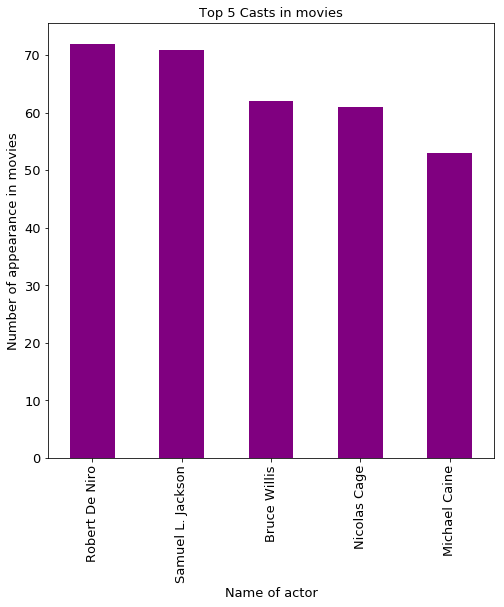

In [29]:
c_bar = top5.plot.bar(color = 'purple', fontsize = 13)

c_bar.figure.set_size_inches(8, 8);

plt.title('Top 5 Casts in movies', color = 'black', fontsize = '13')
plt.xlabel('Name of actor', color = 'black', fontsize = '13')
plt.ylabel('Number of appearance in movies', color = 'black', fontsize = '13');

#### From this, we can deduce that Robert De Niro has got the highest appearance of 72!

### Research Question 3  (Is there any relationship between profit, revenue and profit, budget?)

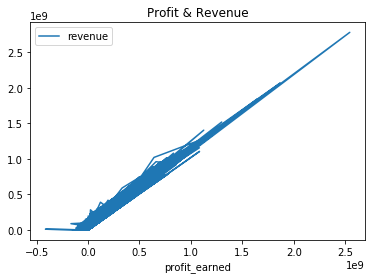

In [35]:
# Let's take a look at profit and revenue first
df.plot(x='profit_earned', y='revenue', kind='line', title='Profit & Revenue');

#### We can see strong positive relationship between the two

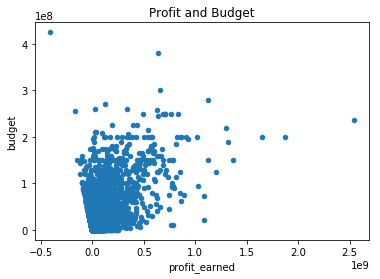

In [39]:
# As for Profit and budget
df.plot(x='profit_earned', y='budget', kind='scatter', title = 'Profit and Budget');

#### From this we can see weak positive relationship

### Research Question 4  (Which year made the highest and lowest profit?)

In [41]:
# We first need to use group by year and sum
profit_per_year = df.groupby('release_year')['profit_earned'].sum()

In [42]:
# This shows us the year with highest profit
profit_per_year.idxmax()

2015

In [44]:
# This similarily shows us the year with lowest profit
profit_per_year.idxmin()

1966

### Now we can visualize this to view it easier

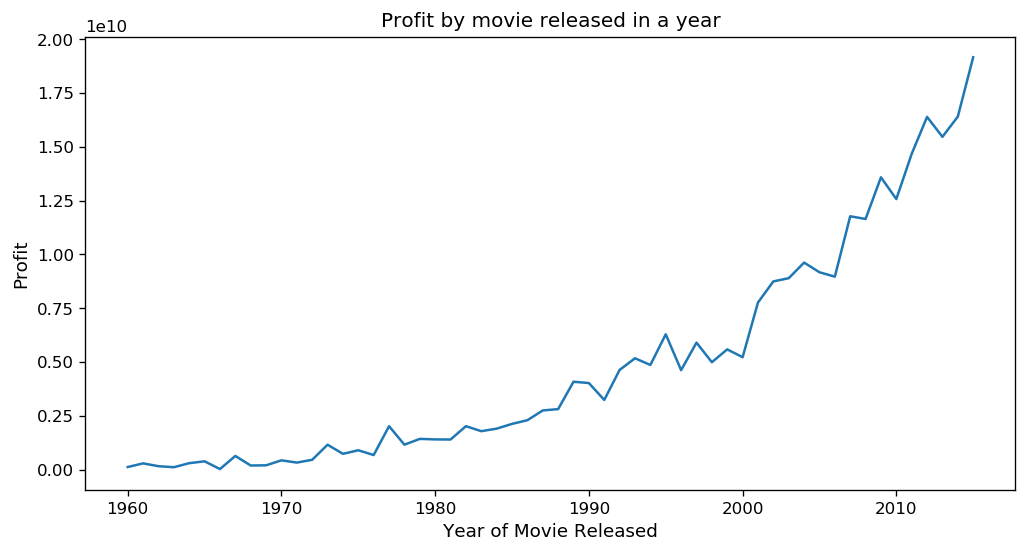

In [46]:
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('Profit', fontsize = 11)
# Title
plt.title('Profit by movie released in a year')

# Plot Line chart
plt.plot(profit_per_year)

# Display plot
plt.show()

<a id='conclusions'></a>
## Conclusions

**1.** The most popular genre found to be: Drama
**2.** The most recurring actor was: Robert De Niro
**3.** There was strong relationship between profit and revenue, and weak one between profit and budget.
**4.** The highest year for profit was 2015, while lowest was 1966

## Limitations

**1.** There were multiple missing data that we had to remove due to it not being feasable enough to be filled.
**2.** There are too many unnecessary columns that I dropped a lot of and was considering more.
**3.** There was data in budget and revenue that is zero, so my analysis might not be error free.

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0